In [1]:
import pyBigWig as BW

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from hdbscan import HDBSCAN

from tqdm import tqdm_notebook
import os
import pickle as pkl


sns.set_style("darkgrid")
%matplotlib inline

ImportError: No module named 'pyBigWig'

In [2]:
DATA_PATH = "../Cardiac_muscle/"
MARKS = ["H3K4me3", "H3K9me3", "H3K36me3", "H3K27me3", "H3K27ac", "H3K4me1"]
SIZE = "100"

In [ ]:
chroms1 = dict()
chrom = "chr1"
for mark in MARKS:
    mark_file = BW.open(f"{DATA_PATH}{mark}_{SIZE}.bigWig")
    chrom_size = mark_file.chroms()[chrom]
    chroms1[mark] = np.array([mark_file.values(chrom, i, i + 1)[0]
                              for i in tqdm_notebook(range(0, chrom_size, int(SIZE)))])

In [ ]:
for key in chroms1:
    with open(f"{DATA_PATH}{key}_100.pkl", "wb") as mark_file:
        pkl.dump(chroms1[key], mark_file)

In [3]:
first_chrom = dict()
for mark in MARKS:
    with open(f"{DATA_PATH}{mark}_100.pkl", "rb") as mark_file:
        first_chrom[mark] = pkl.load(mark_file)

In [4]:
for mark in first_chrom:
    where_nans = np.isnan(first_chrom[mark])
    first_chrom[mark][where_nans] = 0

In [5]:
first_chrom_df = pd.DataFrame(first_chrom)

In [ ]:
first_chrom_truc = first_chrom_df.iloc[988:]

(0, 5)

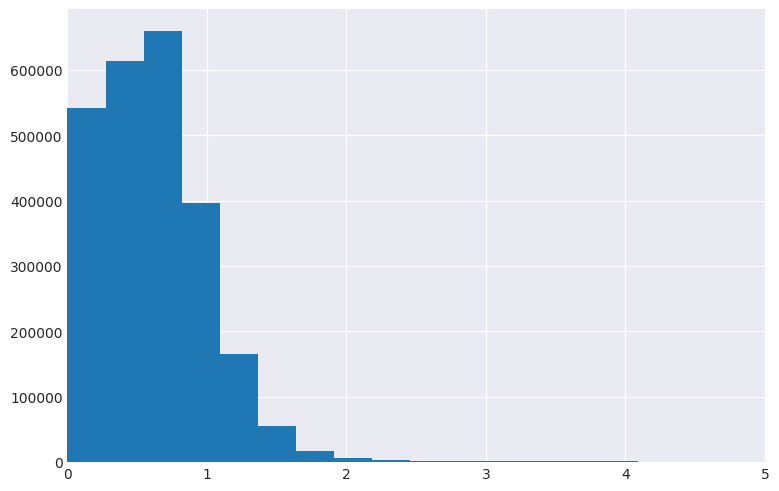

In [6]:
plt.hist(first_chrom_df["H3K4me3"], bins=150)
plt.xlim([0, 5])

In [7]:
first_nonzero = first_chrom_df[first_chrom_df.apply(sum, axis=1) != 0]

(0, 5)

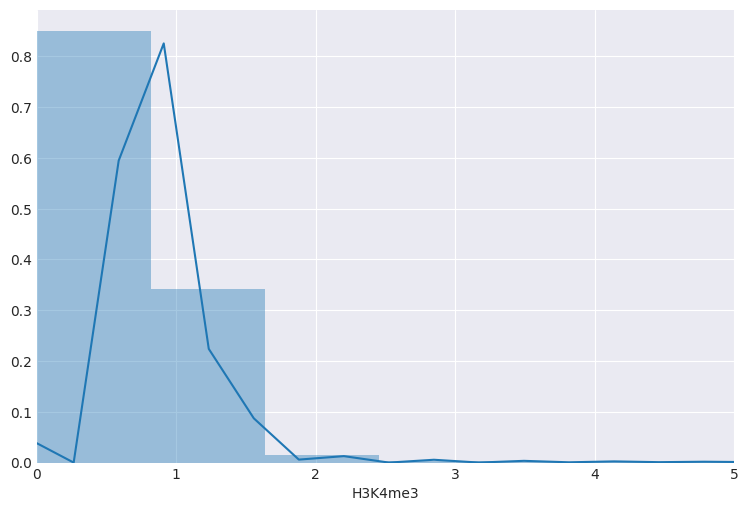

In [8]:
sns.distplot(first_nonzero["H3K4me3"])
plt.xlim([0, 5])

## Let's explore the fucker

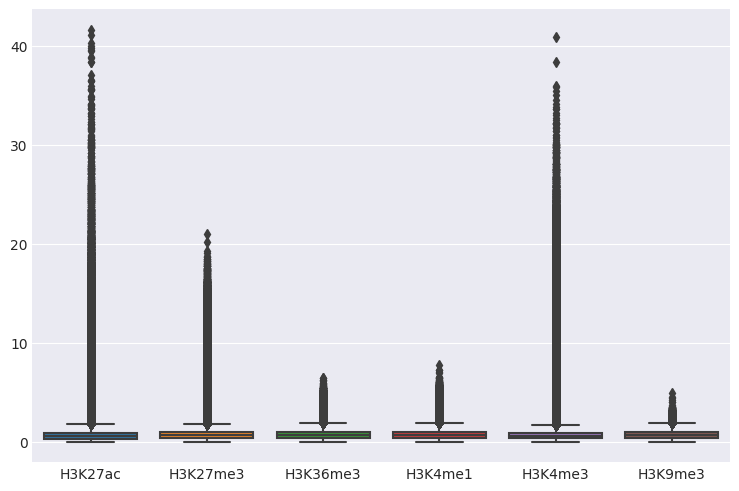

In [9]:
sns.boxplot(data=first_chrom_df)

(0, 2)

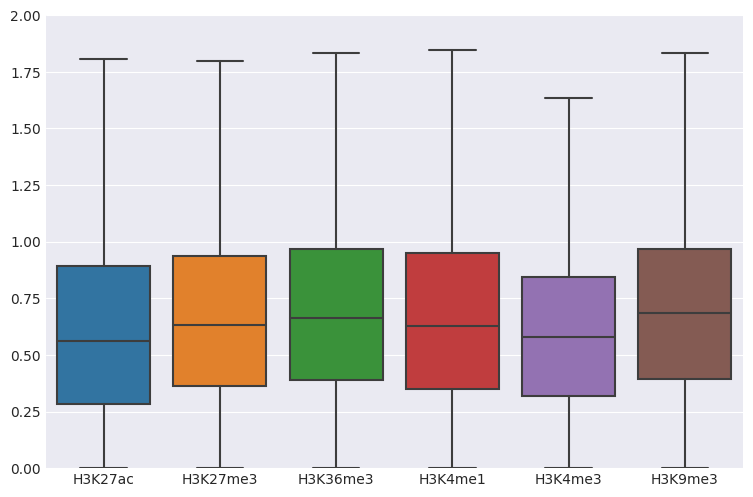

In [10]:
sns.boxplot(data=first_chrom_df, fliersize=0)
plt.ylim([0, 2])

In [47]:
first_nonzero_scaled = pd.DataFrame(scale(first_nonzero), columns=first_nonzero.columns)

In [11]:
state = 100

## PCA stuff

In [12]:
pca = PCA(n_components=2, random_state=state)

In [13]:
pca_table = pca.fit_transform(first_nonzero)

In [14]:
x, y = zip(*pca_table)

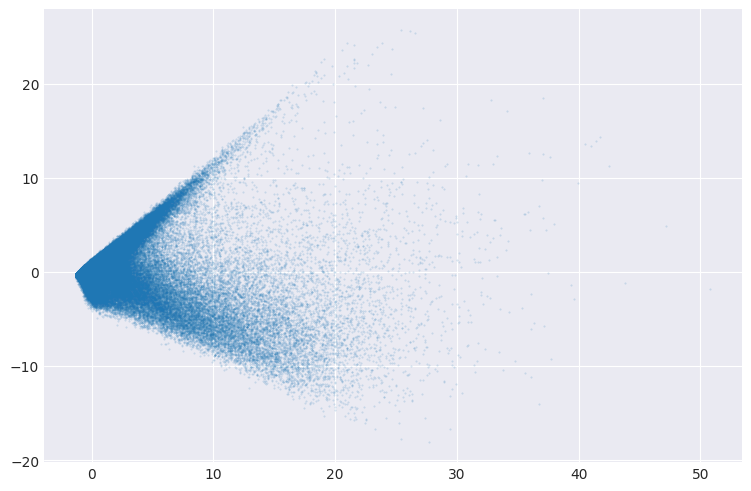

In [16]:
plt.scatter(x, y, s=0.2, alpha=0.2)

In [ ]:
for vx, vy in zip(x, y):
    plt.scatter(x, y, s=0.2, alpha=0.2)

## HDBSCAN stuff

In [ ]:
with open("../Clusters/hdbscan.pkl", "rb") as hdbscan_file:
    hdb = pkl.load(hdbscan_file)

In [ ]:
# hdb = HDBSCAN()

In [ ]:
# hdb_labels = hdb.fit_predict(first_nonzero)

In [ ]:
len(lol_what)

In [ ]:
np.unique(hdb_labels)

In [ ]:
first_nonzero.index = range(len(first_nonzero))
first_nonzero["hdb"] = hdb.labels_

In [ ]:
len(first_nonzero[first_nonzero["hdb"] == -1])

In [ ]:
np.max(first_nonzero["H3K27ac"])

In [ ]:
np.max(first_nonzero["H3K36me3"])

In [ ]:
first_nonzero.head()

## Correlations

In [25]:
corr = first_chrom_df.corr()

In [29]:
cmap = sns.color_palette("RdBu_r")

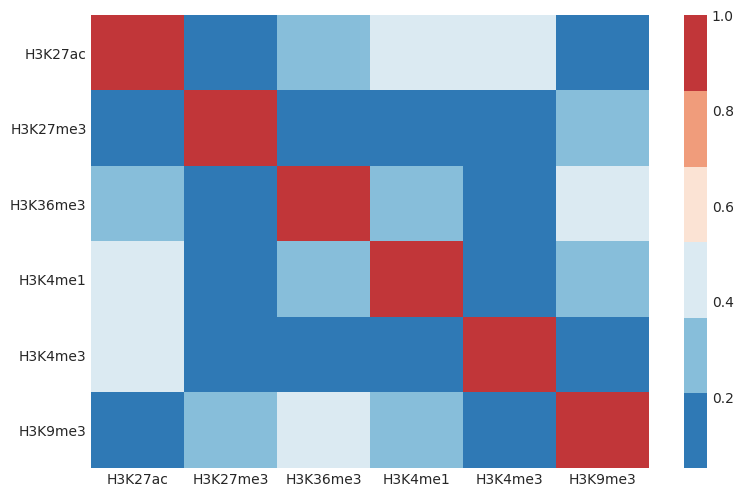

In [30]:
sns.heatmap(corr, cmap=cmap)

## t-SNE stuff

In [49]:
# random sample
little_nonzero = first_nonzero.sample(n=1000, random_state=state)

In [55]:
# random sample
little_nonzero_scaled = first_nonzero_scaled.sample(n=5000, random_state=state)

In [51]:
tsne = TSNE(random_state=state)

In [21]:
TSNE?

In [56]:
%time
tsne_table = tsne.fit_transform(little_nonzero_scaled)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 33.4 µs


In [57]:
x, y = zip(*tsne_table)

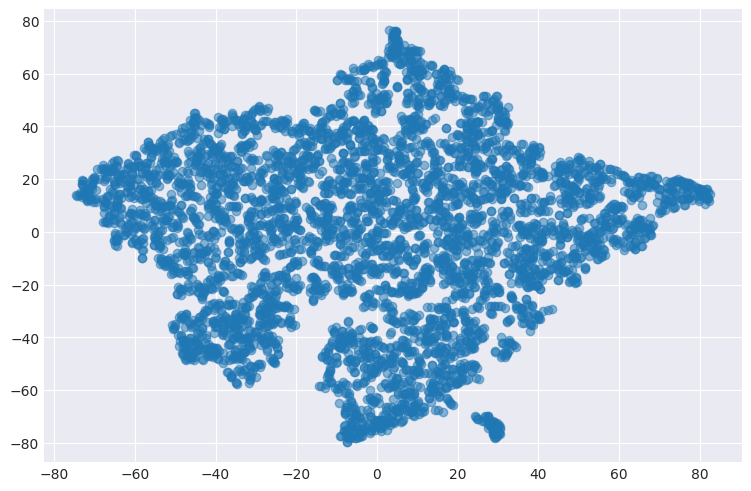

In [59]:
plt.scatter(x, y, alpha=0.5)

In [ ]:
n_clust = 1000
kmeans_all = KMeans(n_clusters=n_clust, random_state=state, verbose=True)
kmeans_nonzero = KMeans(n_clusters=n_clust, random_state=state, verbose=True, n_jobs=4)

In [ ]:
kmeans_nonzero.fit(little_nonzero)

In [ ]:
!telegram-send "Я досчитал, блеать!"

In [ ]:
lol = pca.transform(kmeans_nonzero.cluster_centers_)

In [ ]:
x, y = zip(*lol)

In [ ]:
plt.scatter(x, y)

In [ ]:
kmeans_nonzero.cluster_centers_